# GAME OF SURVIVE WITH BAYES THEOREM

In this tutorial, we will explore sensible decision-making's profound impact on our game through a probabilistic lens.

At the end of this tutarial reader will be learned what is bayes theorem, how to calculate probabilities with this theorem and observed Bayes calculation in many different situations by playing game.

## Table of Contents

### 1 - ) What Is Bayes Theorem?
In this section Bayes Theorem will be explained basically in theory.
### 2 - ) Bayes Theorem With Python
In this section Bayes Theorem will be applied python code. There is also basic game development codes with using ipy widgets.
### 3 - ) Game Section
In game section the game and rules will be explained briefly. And reader could play game and observe the Bayes probabilities created on his / her desicions.
    

# 1) What Is Bayes Theorem?

In this part, Bayes' Theorem will be explained in theory. In the code and game part, the user will have the chance to observe this theorem's calculations.

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

Bayes' theorem is stated mathematically as the following equation:

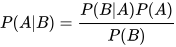

where A and B are events and P(B) ≠ 0.

   * P(A/B) is a conditional probability: the probability of event A occurring given that B is true. It is also called the posterior probability of A given B.
   * P(B/A) is also conditional probability: the probability of event B occurring given that A is true. It can also be interpreted as like likelihood of A given a fixed B because P(B/A) = L(A/B)
   *  P(A) and P(B) are the probabilities of observing A and B respectively without any given conditions; they are known as the prior probability and marginal probability.
   
Source: https://en.wikipedia.org/wiki/Bayes%27_theorem

# 2) Bayes Theorem With Python

In this part, the formula of the theorem will be applied to Python code. It will be explained step by step.

In [1]:
# In this section, we import all libraries that we will use in the project.

from ipywidgets import widgets, Layout,Button,Box # This library is used to have ipywidgets functionalities.
from IPython.display import clear_output # This library is used to clear ipy widgets output. 
from IPython.display import display ,Image, HTML # This library is used to have display, image and HTML ipy widgets.
import pandas as pd # This library is used to create a dataframe.
import random # This library is used to create a random number

In [2]:
# In this section, we define the army types and their advantages for each other.
# The advantages and disadvantages will be explained in the game section.

# Army types are defined as list below. It will be used for df headers and enemy army type selections forward.
enemy_army_type_list = ["CAVALRY","ELEPHANT","ARCHER","ARTILLERY","INFANTRY",
                        "INFANTRY","ARTILLERY","ARCHER","ELEPHANT","CAVALRY"]

# pb_list is defined as a dictionary to store the winning rate of army types.
pb_list = {"CAVALRY"   : [0.5, 0.7, 0.3, 0.4, 0.6],
           "ELEPHANT"  : [0.3, 0.5, 0.6, 0.7, 0.4],
           "ARCHER"    : [0.7, 0.4, 0.5, 0.6, 0.3],
           "ARTILLERY" : [0.6, 0.3, 0.4, 0.5, 0.7],
           "INFANTRY"  : [0.4, 0.6, 0.7, 0.3, 0.5]}
# prob is the dataframe that stores the winning rate of different army types as a table.
prob = pd.DataFrame(pb_list, index =enemy_army_type_list[:5]) 

# Pictures that are used to show army type have been found on the internet their source can be seen with the link.
picture_list=[
"https://www.themilitaryworkshop.com/image/cache/data/Products/John%20Jenkins/Romans/MRRCAV-03R-500x500.jpg",
"https://www.themilitaryworkshop.com/image/cache/data/Products/Thomas%20Gunn/Romans/ROM048A-500x500.jpg",
"https://www.themilitaryworkshop.com/image/cache/data/Products/John%20Jenkins/Roses/THYORK-07-500x500.jpg",
"https://www.themilitaryworkshop.com/image/data/Products/Britains/WWI/23054.jpg",
"https://smithsonianassociates.org/ticketing/images/web-core-2023-pr/1H0-785pr.jpg"]

In [3]:
prob # All the B(given condition possibilities) can be seen in prob dataframe

,CAVALRY,ELEPHANT,ARCHER,ARTILLERY,INFANTRY
CAVALRY,0.5,0.3,0.7,0.6,0.4
ELEPHANT,0.7,0.5,0.4,0.3,0.6
ARCHER,0.3,0.6,0.5,0.4,0.7
ARTILLERY,0.4,0.7,0.6,0.5,0.3
INFANTRY,0.6,0.4,0.3,0.7,0.5


In [4]:
# In this section, we define players information as a class.

class user():
    
    """ This class has 4 functions in it. This class is used to store players` and enemy's information.
    In addition to that with this class functions player can level up, battle and arrange 
    the troops amount.    
    """

    def __init__(self,type):
        
        """ This function is created to initialize
        user class information which contains; the level,
        enemy's and players' army type and total number of troops."""
        
        self.level = 1 # The starting level is defined as 1 initially.
        self.enemy_army_type =enemy_army_type_list[self.level-1] # The initial army type is chosen from the list.
        self.enemy_total_troops = 50 # Initial enemy total troops are defined.
        self.total_troops = 1000 # Initial player total troops are defined.
        self.type = type # The player`s army type is defined with data that comes from the player.
        
    def level_up(self):

        """ This function is created to make the next level harder.
        It will be applied automatically after each level end.
        Basically, there will be 10 levels until the end."""
        
        self.level += 1 # The level is increased by 1
        self.enemy_army_type = enemy_army_type_list[self.level-1] # Enemy army type is changed depending on the level.
        self.enemy_total_troops += self.level*10 # The enemy`s troops number is increased.
        self.total_troops += self.level*10 # The player`s troops number is increased.
        if self.level == 10:# If level is 10 the game is over.
            return "Congratulations you have won the game!"
    
    def troops_brought(self,amount):
        
        """ This function is created to decide how many troops
        will be used for the next battle from the player's own decision"""        
        
        self.total_troops = self.total_troops - amount # The player`s total troops decreased the same as used in battle.

        
    def battle(self,chance):
            
        """ This function is created to make a battle between the user army,
        and the enemy. In this function army type and bringed_troops
        will be used to compute. If the user wins the battle it can go to the
        next level but none of the troops will return. So troops are supposed
        to be used carefully to win the whole game!"""  
        
        random_number = random.random() # Create random number

        if random_number < chance: # Compare the random numbers with chance value
            user.level_up(self) # The player wins the battle and a new level is uploaded.
            return print("""Congratulations you have won the battle!
The next level will be harder! You should first observe your enemy and
choose how many troops you want to take with you.""")      
        else:
            
            if self.total_troops <= 0:# If there are no more troops for the players.           
                
                clear_output() # Clear all outputs from screen.
                return "Game Over" # Return a string value
            
            else:
                # If here are still troops and the battle is lost.  
                return print("You lose the battle but do not worry you still have chance keep going.")
        

In [5]:
def probabilities_calculator(troops_brought):
    
    """ This function is created to calculate all probabilities
    that will be used in the Bayes Calculator.""" 
    # Next line is calculation of p(B/A).
    P_of_B_when_given_A= troops_brought/ (player.enemy_total_troops + troops_brought)
    # Next line is calculation of p(A).
    Con_Chance_of_A = prob[player.enemy_army_type][player.type]
    # Next line is calculatin of p(B).
    All_Con_Chance_B = (Con_Chance_of_A * P_of_B_when_given_A) + ((1 - P_of_B_when_given_A)*(1 - Con_Chance_of_A))
    # The function will return all of these values.
    return P_of_B_when_given_A,Con_Chance_of_A,All_Con_Chance_B

In [6]:
def bayes_calculator(P_of_B_when_given_A,Con_Chance_of_A,All_Con_Chance_B):
    
    """ This function is used to calculate chance in given conditions,
        with using Bayes Theorem method."""
    # Next line is calculatin of p(A/B) = (p(A)*p(B/A)) / p(B))
    wanted_probability = (P_of_B_when_given_A * Con_Chance_of_A) / All_Con_Chance_B    
    # The function will return result chance of winning battle
    return wanted_probability

In [7]:
class system():
    
    """ This class is created to have ipywidget gui functionalities. This class has __init__, start_game
    handle_slider_value, game_play, handle_dropdown_change and screen functions in it.
    """
    
    def __init__(self):
        
        """ This function is created to define self elements. The number of troops brought for battle, dropdown
        list, button and its layout are defined in this section.
        """
        self.troops_brought = 0 #troops_brought is defined it is for how many troops will player use in battle.
        self.button = "button" #button(for gui apperance) is defined firstly as string 
        self.dropdown = "dropdown" # A dropdown menu for army type choosing is created
        # Button's layout is defined
        self.layout = Layout(display='flex',flex_flow='column',align_items='stretch',border='solid',width='50%')
        
    def start_game(self):  

        """ This function is created to start the game with army type selection.
        """
        # The types of armies are list below which player can choose.
        dropdown_option_list = ["Please pick your army tpye"] + enemy_army_type_list
        # The dropdown value is updated due to dropdown_option_list
        self.dropdown = widgets.Dropdown(options= dropdown_option_list[:6],value=dropdown_option_list[0],description='Select:')
        # The code below observes if any changes in dropdown, if so handle_dropdown_change function is applied
        self.dropdown.observe(self.handle_dropdown_change, names='value')
        display(self.dropdown)# Displays the dropdown menu on the screen.          

    def handle_dropdown_change(self,change):
        
        """ This function is created to make process if player changes the dropdown menu.
        """
        
        global player # Global player values are used in this function.
        
        selected_option = change.new  # Capture the selected value.
        player = user(selected_option) # Define the player with choosen army type.
        self.screen() # It calls the screen function to display values on the screen.
        print(f'Selected Army Type: {selected_option}\nDo not forget your chance against the other army types')        
        self.dropdown.close()  # Close the dropdown

    def screen(self):

        """ This function is created to display everytime screen objects.
        """
        # The code below shows how many troops the player would like to use. 
        self.troops_brought = widgets.IntSlider( max=player.total_troops,step=25, description='TB:')
        # The code below captures the changes in troops_brought value if there is change applies handle_slider_value function
        self.troops_brought.observe(self.handle_slider_value, names='value')
        # Define the battle button
        self.button = widgets.Button(description="Battle",button_style="danger",layout =self.layout)
        # When clicking on battle button it calls game_play function
        self.button.on_click(self.game_play)
        # The code below displays the elements on the screen.
        display(widgets.HBox([self.troops_brought,self.button]))     
        
        
    def handle_slider_value(self,change):
        
        """ This function is created to make all calculations and shows new elements on the screen
        with taken players brought troops value. Every time player change the value of the brought
        troops value the new calculations are applied and showed on the screen.
        """

        selected_value = change.new  # This captures new choosen value when player arrange TB stick
        troops = self.troops_brought.value # This is troops that player has choosen to go in next battle.   
        x,y,z  = probabilities_calculator(troops)#This is calculation of probabilities with given troops number.
        chance = bayes_calculator(x,y,z)#This is the final chance after bayes calculation applied.
        clear_output() #It clears screen before news come in. 
        display(widgets.HBox([self.troops_brought, self.button])) # Displays TB arrange stick and buttons. 
        
        # override the default width of the button to 'auto' to let the button grow
        items_layout = Layout( width='auto')
        
        # Arrenging of the boxes` layout
        box_layout = Layout(display='flex',flex_flow='column',align_items='stretch',border='solid',width='50%')

        # Defining all of the player`s information as list
        player_informations = ['Level: %2d'%(player.level),'Your winning Chance: %2.2f'%(chance), 
                               'Your Army Type:  %2s' %(player.type),
                               'Your total troops:  %2d'%(player.total_troops)]
        # Defining all of the enemy`s information as list
        enemy_informations =  ['Number of troops will remain: %2d'%(player.total_troops-troops),
                               'Enemy`s winning Chance: %2.2f'%(1-chance), 
                               'Enemy`s Army Type:  %2s' %(player.enemy_army_type),
                               'Enemy`s total troops:  %2d'%(player.enemy_total_troops)]
        
        # Putting all of the player information into shape of button for better apperance
        items = [Button(description=info, layout=items_layout, button_style='info')
                 for info in player_informations]
        
        # Putting all of the enemy information into shape of button for better apperance
        eitems= [Button(description=info, layout=items_layout, button_style='danger')
                 for info in enemy_informations]
        # Taking all of the player information boxes into one box section
        box = Box(children=items, layout=box_layout)
        
        # Taking all of the enemy information boxes into one box section
        box1 = Box(children=eitems, layout=box_layout)
        try:
            
            
            # Create image objects depends on players army type
            image1 = Image(url=picture_list[enemy_army_type_list.index(player.type)], width=500)
            # Create image objects depends on enemies army type
            image2 = Image(url=picture_list[enemy_army_type_list.index(player.enemy_army_type)], width=500)

            # Use HTML to display the images side by side
            html_code = f"""<div style='display: flex; justify-content: center;'><div>{image1._repr_html_()}
            </div><div style='width: 33%;'></div><div>{image2._repr_html_()}</div></div>"""
            
            display(HTML(html_code)) # Displays the images  
            
        except:#If image's links not valid avoid the error.
            
            pass
        
        display(widgets.HBox([box,box1])) # Displays the boxes
        
        # The code below gives calculations step by step for better understanding
        calculation_massage="""P(B | A)    :The probability of event B occurring given that A is true = %2.2f\n
P(A)        : A is true without any other conditions. = %2.2f\n
P(B | not A): 1 - P(B | A) = %2.2f\n
P(B)        : P(B | A) * P(A) + P(B | not A) * (1 - P(A))\n
P(B)        : (%2.2f) * (%2.2f) + (%2.2f) * (%2.2f) = %2.2f\n
P(A | B)    : (P(A) * P(B|A)) / P(B)\n 
P(A | B)    : (%2.2f * %2.2f) / %2.2f = %2.2f
                            """%(x,y,(1-x),x,y,(1-x),(1-y),z,y,x,z,chance)
        print(calculation_massage)# Prints the steps

    def game_play(self,change):

        """ This function is used to apply all steps after clicking battle button!"""

        clear_output() # Firstly clear everything on the screen
        selected_option = self.dropdown.value # This is army type that player has choosen.
        troops = self.troops_brought.value # This is troops that player has choosen to go in next battle.   
        x,y,z  = probabilities_calculator(troops)#This is calculation of probabilities with given troops number.
        chance = bayes_calculator(x,y,z)#This is final bayes calculation applied.
        player.troops_brought(troops)#This function is called to decrease the brought amount of troops from total.
        result = player.battle(chance)#This is for battle simulation to check if win or lose.  
        print("Battle is over!")# Prints battle is finished succesfully.
        if result == "Game Over": # If the result is game over.
            
            self.troops_brought.close()
            try:
                # Upload the game over images
                url = 'https://t3.ftcdn.net/jpg/01/45/60/06/360_F_145600677_yQimjwKWasy3I1XVQvTYeCNGMInU9OKx.jpg'

                image = Image(url=url, width=500)# Describe the image with url and size
                display(image)# display the image
            
            except:#If url is no longer valid avoid error.
                
                display("Game Over")# display the massage
            
        else: #If the game is not over yet.
            
            self.screen()#Shows player to the main screen again.
            

        
   
        

        
system = system()  # Declaration of the system class    

# 3) Game Section

In this section, the user can play the game with his/her own decisions. The user can observe results - risks that are taken for each level. In this part, ipywidget is used to collect players' decisions.
But the thing is not always the best decisions for probability win as in real life. The important thing is the player can see and understand in each step what is the probability of being successful with his or her choice.
And where the probability comes from.

Basically, there are 10 levels if the player wins all of the levels the game will end. When the player makes a battle, the player loses all of his brought troops if there are no more troops game will end also.

The winning rates of all types of armies can be seen below. The player will pick one of this type of army, and battle up to 10 wars with enemies armies. Enemies will be 2 of each different type of that so picking army type is important to finish the game! 

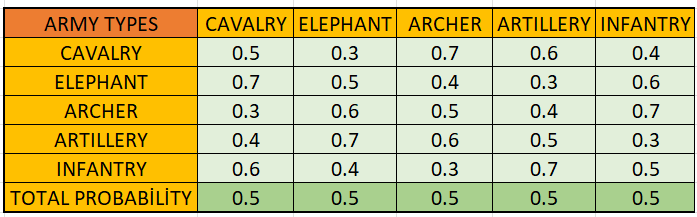

#  Before start game user should pick what army type he/she will use.

In [8]:
system.start_game() # Start the game

Congratulations you have won the battle!
The next level will be harder! You should first observe your enemy and
choose how many troops you want to take with you.
Battle is over!
